In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [46]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

# 4.1 色彩空间基础

### 4.1.1 GRAY 色彩空间

In [4]:
# GRAY：8位灰度图，[0,255]
# RGB转GRAY：
# Gray=0.299R+0.587G+0.114B  # 标准转换式：opencv中使用
# Gray=(R+G+B)/3             # 简化形式

### 4.1.2 XYZ 色彩空间

In [5]:
# RGB转XYZ：
# [x,Y,Z] = [[0.412453,0.357580,0.180423],[0.212671,0.715160,0.072169],[0.019334,0.119193,0.950227]] * [R,G,B]
# XYZ转RGB：
# [R,G,B] = [[3.240479,-1.53715,-0.498535],[-0.969256,1.875991,0.041556],[0.055648,-0.204043,1.057311]] * [X,Y,Z]

### 4.1.3 YCrCb 色彩空间

In [7]:
# RGB三原色具有相同重要性，忽略了亮度信息，人眼视觉系统（HVS）对颜色的敏感度要低于对亮度的敏感度
# YCrCb中，Y代表光源亮度，色度信息保存在Cr和Cb中，Cr：红色分量信息，Cb：蓝色分量信息
# RGB光源中，绿色分量的影响最大，蓝色分量的影响最小
# RGB转YCrCb：
# Y = 0.299R + 0.587G + 0.114B
# Cr = (R-Y)*0.713 + delta
# Cb = (B-Y)*0.564 + delta
# delta = 128/32768/0.5  # 8位图像/16位图像/单精度图像
# YCrCb转RGB：
# R = Y + 1.403*(Cr-delta)
# G = Y - 0.714*(Cr-delta) - 0.344*(Cb-delta)
# B = Y + 1.773*(Cb-delta)
# delta:与上式相同

### 4.1.4 HSV 色彩空间

In [8]:
# RGB是从硬件角度提出的颜色模型，HSV是面向视觉感知的颜色空间
# HSV：
# 色调（Hue）：与波长相关
# 饱和度（Saturation）：纯净度，一种颜色中混合白光的数量
# 亮度（Value）：物体反射度，白色越多亮度越高，黑色越多亮度越低

# 色调取值：[0,360],我们将物理的颜色分布在圆上
# 色调值 颜色
# 0     红色
# 60    黄色
# 120   绿色
# 180   青色
# 240   蓝色
# 300   品红
# 饱和度：[0,1], 比值
# 亮度：[0,1], 比值

# RGB转HSV：
# 先将RGB值转到[0,1],然后再进行处理
# V = max(R,G,B)
# S = (V-min(R,G,B))/V  # V!=0
# S = 0                 # V=其他情况
# H = (60*(G-B))/(V-min(R,G,B))      # V=R
# H = 120+(60*(B-R))/(V-min(R,G,B))  # V=G
# H = 240+(60*(R-G))/(V-min(R,G,B))  # V=B
# 若计算的H<0，H = H + 360

# HSV转RGB：
# opencv官方文档有完整公示

### 4.1.5 HLS 色彩空间

In [9]:
# H（Hue）：色调，L（lightness）：光亮度/明度，S（Saturation）：饱和度
# 与HSV相似，只是用“光亮度/明度L”替换了“亮度Value”

### 4.1.6 CIEL\*a\*b\* 色彩空间

In [10]:
# 均匀色彩空间模型，从视觉感知均匀角度讲，人所感知到的两种颜色区别程度，应与这两种颜色在色彩空间中的距离成正比
# L*分量：表示像素的亮度，[0,100]，从纯黑到纯白
# a*分量：表示从红色到绿色的范围，[-127,127]
# b*分量：表示从黄色到蓝色的范围，[-127,127]

# RGB转CIEL*a*b*：
# 需先将RGB色彩空间值转到[0,1]之间，再进行处理
# 由于CIEL*a*b*色彩空间是在CIE和XYZ色彩空间基础上发展而来的，处理时需将RGB转XYZ，再转CIEL*a*b*
# 公式看书P81

### 4.1.7 CIEL\*u\*v\* 色彩空间

In [11]:
# CIEL*u*V*同CIEL*a*b*一样，都是均匀的颜色模型，CIEL*u*V*与设备无关，适用于显示器显示和根据加色原理的场合
# 该模型中比较强调对红色的表示，即对红色的变化比较敏感，对蓝色的变化不太敏感
# RGB转CIEL*u*V*：
# 先将RGB转XYZ，在将XYZ转CIEL*u*V*
# 公式看书P82

### 4.1.8 Bayer 色彩空间

In [12]:
# 被广泛应用在CCD和CMOS相机中，它能从如图单平面R，G，B交错表内获取色彩图像
# 看书P82

# 4.2 类型转换函数

In [13]:
# 使用cv2.cvtColor()函数实现色彩空间变换
# dst = cv2.cvtColor(src, code [,dstCn])
# dst：输出图像，与原始图像具有相同的数据类型和深度
# src：输入图像，可以是8位无符号数，16位无符号数，单精度浮点数等
# code：色彩空间转换码，如表枚举所示，看书P83
# dstCn：目标图像通道数，默认参数位0，通道数自动通过输入图像和code得到

# 需注意，BGR与RGB色彩空间不同，1，2，3和4，5，6通道分别存储B，G，R和B，G，R，以此类推
# 色彩空间转换都要用到如下约定：
# 8位图像范围：[0,255]
# 16位图像范围：[0,65535]
# 浮点数图像范围：[0.0,1.0]
# 对于线性转换来说，这些值无所谓，但对于非线性转换来说，输入的RGB图像必须归一化到其对应的范围内，才能获取正确的转换结果
# 如HSV或HLS中色调值在[0,360]，需将色调值除以2，变为[0,180]，以满足存储需要；
# 再比如CIEL*a*b*中a，b通道值在[-127,127]，需每个值都加127
# 注意，由于计算过程存在四舍五入，转换过程并不是精确可逆的

# 4.3 类型转换实例

### 4.3.1 通过数组观察转换效果

In [16]:
# 将BGR图像转位灰度图
# img = cv2.imread("/Users/tanjun/Desktop/加班截图/WechatIMG115.jpeg", 0)
img = np.random.randint(0,256,size=(2,4,3),dtype=np.uint8)
rst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("img:\n", img)
print("rst:\n", rst)
print("像素点（1，0）直接转换得到的值：", img[1,0,0]*0.114+img[1,0,1]*0.587+img[1,0,2]*0.299)
print("像素点（1，0）使用公示得到的值：", rst[1,0])

img:
 [[[ 89 222 186]
  [158  31  92]
  [ 69 161 223]
  [ 77 170 174]]

 [[136 190 113]
  [  0 101  74]
  [146 162 207]
  [144  30  10]]]
rst:
 [[196  64 169 161]
 [161  81 174  37]]
像素点（1，0）直接转换得到的值： 160.821
像素点（1，0）使用公示得到的值： 161


In [17]:
# 将灰度图转换成BGR图像
img = np.random.randint(0,256,size=(2,4),dtype=np.uint8)
rst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print("img:\n", img)
print("rst:\n", rst)

# 将灰度图转换为RGB或BGR，结果所有通道值相同

img:
 [[246 157 217  96]
 [  4   5 173 210]]
rst:
 [[[246 246 246]
  [157 157 157]
  [217 217 217]
  [ 96  96  96]]

 [[  4   4   4]
  [  5   5   5]
  [173 173 173]
  [210 210 210]]]


In [19]:
# 将图像在BGR与RGB之间相互转换
img = np.random.randint(0,255,size=(2,4,3),dtype=np.uint8)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
print("img:\n", img)
print("rgb:\n", rgb)
print("bgr:\n", bgr)

img:
 [[[ 74  54 254]
  [  1 243  17]
  [253 137  58]
  [187 122   0]]

 [[250   0 166]
  [202 111 227]
  [163  17  34]
  [215 113 137]]]
rgb:
 [[[254  54  74]
  [ 17 243   1]
  [ 58 137 253]
  [  0 122 187]]

 [[166   0 250]
  [227 111 202]
  [ 34  17 163]
  [137 113 215]]]
bgr:
 [[[ 74  54 254]
  [  1 243  17]
  [253 137  58]
  [187 122   0]]

 [[250   0 166]
  [202 111 227]
  [163  17  34]
  [215 113 137]]]


### 4.3.2 图像处理实例

# 4.4 HSV 色彩空间讨论

### 4.4.1 基础知识

In [20]:
# 1.色调H：
# 取值范围：[0,360] ---> [0,255]：映射存储范围

# 2.饱和度S：
# 灰度颜色包含R，G，B成分相等，相当于一种极不饱和颜色，饱和度为0
# 取值范围：[0,1] ---> [0,255]：映射存储范围

# 3.亮度V：
# 取值范围：[0,1] ---> [0,255]：映射存储范围

### 4.4.2 获取指定颜色

In [21]:
# opencv中测试RGB不同颜色转换到HSV后各个分量值
# 测试opencv中蓝色的HSV模式值
imgBlue = np.zeros([1,1,3],dtype=np.uint8)
imgBlue[0,0,0] = 255
Blue = imgBlue
BlueHSV = cv2.cvtColor(Blue, cv2.COLOR_BGR2HSV)
print("Blue:\n",Blue)
print("BlueHSV:\n",BlueHSV)

Blue:
 [[[255   0   0]]]
BlueHSV:
 [[[120 255 255]]]


### 4.4.3 标记指定颜色

In [24]:
# 色差主要表现在H通道上，改变H通道值可以改变颜色

In [22]:
# 1.通过inRange函数锁定特定值
# dst = cv2.inRange(src,lowerb,upperb)
# dst：输出结果，大小与src一致，其值取决于src中对应位置上的值是否处于区间[lowerb,upperb]内
# src：输入结果
# lowerb：范围下界
# upperb：范围上界

In [23]:
# 使用inRange函数将图像内的在[100,200]内的值标注出来
img = np.random.randint(0,256,size=(5,5),dtype=np.uint8)
min = 100
max = 200
mask = cv2.inRange(img,min,max)
print("img\n", img)
print("mask\n", mask)

img
 [[252  89 140 233 191]
 [164 100 126 174 234]
 [175 235 205   2  65]
 [244 105 162 111 191]
 [113 127 176 176 110]]
mask
 [[  0   0 255   0 255]
 [255 255 255 255   0]
 [255   0   0   0   0]
 [  0 255 255 255 255]
 [255 255 255 255 255]]


In [25]:
# 2.通过基于掩码的按位与显示ROI
# 正常显示图像感兴趣区域（ROI），将其余区域显示黑色
img = np.ones([5,5],dtype=np.uint8)*9
mask = np.zeros([5,5],dtype=np.uint8)
mask[0:3,0] = 1
mask[2:5,2:4] = 1
roi = cv2.bitwise_and(img,img,mask=mask)
print("img\n",img)
print("mask\n",mask)
print("roi\n",roi)

img
 [[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]
mask
 [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 1 1 0]
 [0 0 1 1 0]
 [0 0 1 1 0]]
roi
 [[9 0 0 0 0]
 [9 0 0 0 0]
 [9 0 9 9 0]
 [0 0 9 9 0]
 [0 0 9 9 0]]


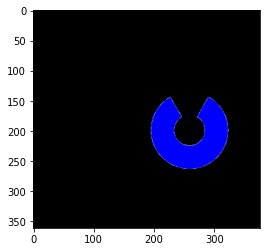

In [32]:
# 3.显示特定颜色
# 分别提取opencv的log图像内的红色，绿色，蓝色
# 通常HSV模式下蓝色值在120左右：[120-10,120+10]
# S通道和V通道取值范围一般在:[100,255],这主要是因为当饱和度和亮度太低时，计算出来的色调可能不靠谱

# 据上所述，各种颜色的HSV区间值分布在[H-10,100,100]和[H+10,255,255]之间
# 蓝色：[110,100,100]-[130,255,255]
# 绿色：[50,100,100]-[70,255,255]
# 红色：[0,100,100]-[10,255,255]

# 利用inRange函数查找指定颜色区域，然后利用基于掩码的按位与运算将颜色提取出来
opencv = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/log.jpg")
hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV)

minBlue = np.array([110,50,50])
maxBlue = np.array([130,255,255])
mask = cv2.inRange(hsv, minBlue, maxBlue)
blue = cv2.bitwise_and(opencv,opencv,mask=mask)
img_show(blue)

### 4.4.4 标记肤色

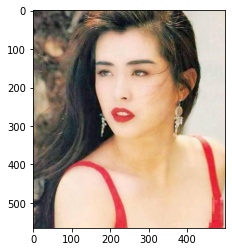

In [38]:
# 在标记特定颜色的基础上，可以将标注范围进一步推广到特定过得对象上
# 例如通过分析估算出肤色在HSV色彩空间中的范围，筛选出肤色范围内的值，提取肤色

# 提取一幅图像内的肤色部分
# 色调值：[5,170]
# 饱和度：[25,166]

wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
hsv = cv2.cvtColor(wzx,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

minHue = 5
maxHue = 170
hueMask = cv2.inRange(h,minHue,maxHue)

minSat = 25
maxSat = 166
satMask = cv2.inRange(s,minSat,maxSat)

mask = hueMask & satMask
roi = cv2.bitwise_and(wzx,wzx,mask=mask)

img_show(wzx)

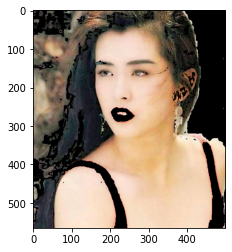

In [39]:
img_show(roi)

### 4.4.5 实现艺术效果

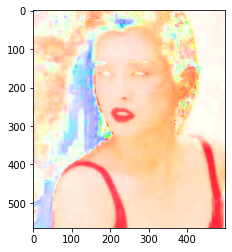

In [40]:
# 在HSV色彩空间内进行分量值的调整能生成一些有趣的效果
# 调整V通道，观察结果
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
hsv = cv2.cvtColor(wzx,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
v[:,:] = 255
newHSV = cv2.merge([h,s,v])
art = cv2.cvtColor(newHSV,cv2.COLOR_HSV2BGR)
img_show(art)

# 4.5 alpha 通道

In [41]:
# 在RGB三通道基础上还可以加上一个A通道，也叫alpha通道，表示透明度
# 这种四通道色彩空间被称为RGBA色彩空间，PNG图像是一种典型的4通道图像
# alpha赋值范围是[0,1]或[0,255],表示从透明到不透明

# 分析alpha通道
img = np.random.randint(0,255,size=(2,3,3),dtype=np.uint8)
bgra = cv2.cvtColor(img,cv2.COLOR_BGR2BGRA)
print("img\n",img)
print("bgra\b",bgra)

b,g,r,a = cv2.split(bgra)
print("a\n",a)
a[:,:] = 125
bgra = cv2.merge([b,g,r,a])
print("bgra\n",bgra)

img
 [[[135 109 166]
  [117 224 166]
  [125 244 155]]

 [[157 147 100]
  [ 75 119 145]
  [ 52 181 186]]]
bgra [[[135 109 166 255]
  [117 224 166 255]
  [125 244 155 255]]

 [[157 147 100 255]
  [ 75 119 145 255]
  [ 52 181 186 255]]]
a
 [[255 255 255]
 [255 255 255]]
bgra
 [[[135 109 166 125]
  [117 224 166 125]
  [125 244 155 125]]

 [[157 147 100 125]
  [ 75 119 145 125]
  [ 52 181 186 125]]]


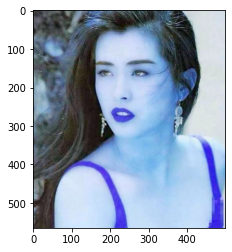

In [49]:
# 对图像alpha通道进行处理
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
bgra = cv2.cvtColor(wzx,cv2.COLOR_BGR2BGRA)
b,g,r,a = cv2.split(bgra)
a[:,:] = 125
bgra125 = cv2.merge([b,g,r,a])
a[:,:] = 0
bgra0 = cv2.merge([b,g,r,a])
img_show(bgra)

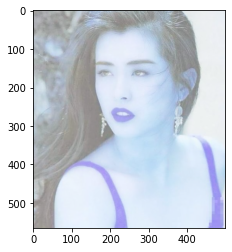

In [50]:
img_show(bgra125)

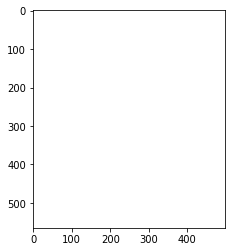

In [51]:
img_show(bgra0)